In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
from keras import regularizers
import plotly.express as px
from pathlib import Path
from datetime import datetime as dt
import time
# import tensorflow.keras
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from IPython.display import Image


In [3]:
## function to find the distance in kilometers between two geo-spatial co-ordinates.  Based on excample from Scikit Learn documentation
def get_distance(from_lat, from_lng, to_lat, to_lng):
    from sklearn.metrics.pairwise import haversine_distances
    from math import radians
    start =[]
    end =[]
    start.append(from_lat)
    start.append(to_lat)
    end.append(to_lat)
    end.append(to_lng)
    start_in_radians = [radians(_) for _ in start]
    end_in_radians = [radians(_) for _ in end]
    result = haversine_distances([start_in_radians, end_in_radians])
    result * 6371000/1000 
    return result
    

In [4]:
## function to assign the U.S. Bureau of Economic Analysis region to a state.
def get_region(state):
    
    states_to_bea_regions = {
        "AL": "Southeast",
        "AK": "Far West",
        "AZ": "Southwest",
        "AR": "Southeast",
        "CA": "Far West",
        "CO": "Rocky Mountain",
        "CT": "New England",
        "DE": "Mideast",
        "DC": "Mideast",
        "FL": "Southeast",
        "GA": "Southeast",
        "HI": "Far West",
        "ID": "Rocky Mountain",
        "IL": "Great Lakes",
        "IN": "Great Lakes",
        "IA": "Plains",
        "KS": "Plains",
        "KY": "Southeast",
        "LA": "Southeast",
        "ME": "New England",
        "MD": "Mideast",
        "MA": "New England",
        "MI": "Great Lakes",
        "MN": "Great Lakes",
        "MS": "Southeast",
        "MO": "Great Lakes",
        "MT": "Rocky Mountain",
        "NE": "Plains",
        "NV": "Southwest",
        "NH": "New England",
        "NJ": "Mideast",
        "NM": "Southwest",
        "NY": "Mideast",
        "NC": "Southeast",
        "ND": "Plains",
        "OH": "Great Lakes",
        "OK": "Southwest",
        "OR": "Far West",
        "PA": "Mideast",
        "RI": "New England",
        "SC": "Southeast",
        "SD": "Plains",
        "TN": "Southeast",
        "TX": "Southwest",
        "UT": "Rocky Mountain",
        "VT": "New England",
        "VA": "Mideast",
        "WA": "Far West",
        "WV": "Southeast",
        "WI": "Great Lakes",
        "WY": "Rocky Mountain"
    }
    region = states_to_bea_regions.get(state)
    return region



This dataset offers a variety of attributes valuable for comprehensive analysis. It contains 555,719 instances and 22 attributes, a mix of categorical and numerical data types. Importantly, the dataset is complete with no null values. Here's a breakdown of the attributes:  

1. 
Trans_date_trans_time: Timestamp of the transaction (date and ti)    
2 .C
C_n   um:Unique customer identification ner  mb  
 Me
rc: : hantThe merchant involved in the transact   on.
Cat::egory Transaction type (e.g., personal, ca 
, etc...5.
5.  Amnt: Transaction amount
6.  ount.
First: Cardholdert   
. 
7.  nam::e.
Last Cardholsla  
8.
8.  t name.
Gender: Caser'  
9.
9.   gender.
Street: Cardholdtree  
10.
10. Caddress.
City: Cardholderr of  
11.
11. residence.
State: Cardholdfate o  
12.
12.  residence.
Zrdhole  
13. 
13. s z ip code.
Lat:Latitueardhold  
14.
14. r's location.
Long: Longid cardhol 
15. 
15. r's loca  tion.
City_pop:Popurdf te ca  
16. 
16. hol  der'solJob:Cardh.  
17.
17. der's job titlr: Cardholde  
18.
18. 's date of birth.
Tra Unique tran  
19.
19. action identifier.
Unix_ti snsaction time  
20. 
20. amp (Unix   format). lat:Merchant's  
21.
21. location (latitude).
Mlng: Merchant's  
22.   
22. ocation   (longitude).
Is_fraud:Fraudulent* tra stion indicator (1 = f**raud, 0 = legitimate). This is thtarget variable for c***lassification purposes.

In [5]:
fraud_test_df = pd.read_csv('resources/fraud test.csv')

In [6]:
fraud_test_df.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,226976,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,15/12/2020 21:26,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,23/03/1977,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,16,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800430e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521420e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635330e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


In [7]:
fraud_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Preprocessing and Feature Engineering

In [8]:
# moving the Unamed column to the index and renaming it 'ID'
fraud_test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
fraud_test_df.set_index('ID', inplace=True, drop=True, verify_integrity ='True')

In [9]:
#creating cardholder age feature
fraud_test_df['date_dob'] = pd.to_datetime(fraud_test_df['dob'], format='%d/%m/%Y')
fraud_test_df['dt_trans_date_time'] = pd.to_datetime(fraud_test_df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
fraud_test_df['age_years'] = (dt.today()- fraud_test_df['date_dob'])/pd.Timedelta('365 days')
fraud_test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date_dob,dt_trans_date_time,age_years
ID,,,,,,,,,,,,,,,,,,,,,
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,1968-03-19,2020-06-21 12:14:00,56.119865
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,1990-01-17,2020-06-21 12:14:00,34.273290
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,1970-10-21,2020-06-21 12:14:00,53.528084
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,1987-07-25,2020-06-21 12:15:00,36.758221
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,1955-07-06,2020-06-21 12:15:00,68.832194


In [10]:
fraud_test_df['merchant'].value_counts()

merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

In [11]:
#creating distance between cardholder and merchant feature and economic region feature from the state abbreviation.
for index, row in fraud_test_df.iterrows():
    fraud_test_df.at[index, 'distance_km'] = get_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long'])[0][1]
    fraud_test_df.at[index, 'region'] = get_region(row['state'])

In [12]:
# collapsing job categories to 'other' category for any category with fewere than 300 entries
job_counts=fraud_test_df['job'].value_counts()
job_counts_df = job_counts.to_frame(name='counts')
for index, row in job_counts_df.iterrows():
    if job_counts_df.at[index, 'counts'] < 300:
        fraud_test_df.loc[fraud_test_df['job'] == index, ['job']] = 'other'
        

In [13]:
fraud_test_df['job'].value_counts()

job
other                                                          12796
Film/video editor                                               4119
Exhibition designer                                             3968
Surveyor, land/geomatics                                        3756
Naval architect                                                 3750
                                                               ...  
Scientist, clinical (histocompatibility and immunogenetics)      413
Sports administrator                                             412
Ambulance person                                                 407
Plant breeder/geneticist                                         406
Media planner                                                    402
Name: count, Length: 418, dtype: int64

In [14]:
fraud_test_df['merchant'].value_counts()

merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

In [15]:
# fraud_test_df.to_csv('G:\My Drive\Boot Camp\Project_4\\fraud_test_extended.csv', sep =',')

## Splitting Training and Testing data
y = is_fraud  

Dropped from X features:
1. is_fraud
2. first
3. last
4. street
5. dob
6. trans_date_trans_time
7. lat
8. long
9. merch_lat
10. merch_long
11. trans_num

## Feature Encoding
1. get_dummies/one_hot_encoders: Gender, region
3. Target_encoder:  city, state, jobs, merchant, cc_num  

In [16]:
y = fraud_test_df['is_fraud']
X = fraud_test_df.copy()
dummies= pd.get_dummies(X[['category','gender', 'region']])

In [17]:
dummy_columns = dummies.columns.tolist()
dummy_columns

['category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'gender_F',
 'gender_M',
 'region_Far West',
 'region_Great Lakes',
 'region_Mideast',
 'region_New England',
 'region_Plains',
 'region_Rocky Mountain',
 'region_Southeast',
 'region_Southwest']

In [18]:
X[dummy_columns] = dummies[dummy_columns]

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    555719 non-null  object        
 1   cc_num                   555719 non-null  float64       
 2   merchant                 555719 non-null  object        
 3   category                 555719 non-null  object        
 4   amt                      555719 non-null  float64       
 5   first                    555719 non-null  object        
 6   last                     555719 non-null  object        
 7   gender                   555719 non-null  object        
 8   street                   555719 non-null  object        
 9   city                     555719 non-null  object        
 10  state                    555719 non-null  object        
 11  zip                      555719 non-null  int64         
 12  lat                  

In [20]:
X.drop(['is_fraud', 'category', 'cc_num', 'state', 'city', 'city_pop', 'date_dob', 'gender', 'first', 'last', 'street', 'dob', 'trans_date_trans_time', 'dt_trans_date_time', 'lat', 'long', 'merch_lat', 'merch_long', 'trans_num', 'unix_time', 'region'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   merchant                 555719 non-null  object 
 1   amt                      555719 non-null  float64
 2   zip                      555719 non-null  int64  
 3   job                      555719 non-null  object 
 4   age_years                555719 non-null  float64
 5   distance_km              555719 non-null  float64
 6   category_entertainment   555719 non-null  bool   
 7   category_food_dining     555719 non-null  bool   
 8   category_gas_transport   555719 non-null  bool   
 9   category_grocery_net     555719 non-null  bool   
 10  category_grocery_pos     555719 non-null  bool   
 11  category_health_fitness  555719 non-null  bool   
 12  category_home            555719 non-null  bool   
 13  category_kids_pets       555719 non-null  bool   
 14  category_

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416789 entries, 550670 to 128037
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   merchant                 416789 non-null  object 
 1   amt                      416789 non-null  float64
 2   zip                      416789 non-null  int64  
 3   job                      416789 non-null  object 
 4   age_years                416789 non-null  float64
 5   distance_km              416789 non-null  float64
 6   category_entertainment   416789 non-null  bool   
 7   category_food_dining     416789 non-null  bool   
 8   category_gas_transport   416789 non-null  bool   
 9   category_grocery_net     416789 non-null  bool   
 10  category_grocery_pos     416789 non-null  bool   
 11  category_health_fitness  416789 non-null  bool   
 12  category_home            416789 non-null  bool   
 13  category_kids_pets       416789 non-null  bool   
 14  cate

In [22]:
# creating Target Encoder with only the training features and training targets
myEncoder = TargetEncoder(random_state = 1)
X_train_encoded = myEncoder.fit_transform(X_train[['merchant', 'job' ]], y_train)
X_test_encoded = myEncoder.transform(X_test[['merchant', 'job' ]])

In [23]:
X_train_enc_df=X_train.copy()
X_test_enc_df=X_test.copy()
X_train_enc_df[['merchant', 'job' ]]=X_train_encoded
X_test_enc_df[['merchant',  'job' ]]=X_test_encoded

In [24]:
X_train_enc_df

,merchant,amt,zip,job,age_years,distance_km,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,gender_F,gender_M,region_Far West,region_Great Lakes,region_Mideast,region_New England,region_Plains,region_Rocky Mountain,region_Southeast,region_Southwest
ID,,,,,,,,,,,,,,,,,,,,,
550670,0.001638,14.14,36617,0.000000,52.319865,1.670014,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
363029,0.010806,125.51,23937,0.002767,38.651372,1.488226,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
122377,0.001400,53.91,98238,0.000000,39.654112,1.450375,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
248152,0.009479,78.64,5084,0.002877,34.495208,1.327182,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
189857,0.000000,21.16,4047,0.004980,68.174660,1.296576,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,0.004328,1.28,13647,0.000000,32.892468,1.324783,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
491263,0.012757,5.87,76626,0.006884,46.155482,1.744186,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
470924,0.001604,8.11,76008,0.019604,39.813016,1.728873,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [25]:
#writing out encoded file for sharing
# fraud_encoded_df.to_csv('G:\My Drive\Boot Camp\Project_4\\fraud_test_encoded.csv', sep =',')

In [26]:
X_test_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138930 entries, 207181 to 313666
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   merchant                 138930 non-null  float64
 1   amt                      138930 non-null  float64
 2   zip                      138930 non-null  int64  
 3   job                      138930 non-null  float64
 4   age_years                138930 non-null  float64
 5   distance_km              138930 non-null  float64
 6   category_entertainment   138930 non-null  bool   
 7   category_food_dining     138930 non-null  bool   
 8   category_gas_transport   138930 non-null  bool   
 9   category_grocery_net     138930 non-null  bool   
 10  category_grocery_pos     138930 non-null  bool   
 11  category_health_fitness  138930 non-null  bool   
 12  category_home            138930 non-null  bool   
 13  category_kids_pets       138930 non-null  bool   
 14  cate

In [27]:
# putting feature column names into a list for later use
X_train_col = X_train_enc_df.columns.tolist()
X_train_col

['merchant',
 'amt',
 'zip',
 'job',
 'age_years',
 'distance_km',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'gender_F',
 'gender_M',
 'region_Far West',
 'region_Great Lakes',
 'region_Mideast',
 'region_New England',
 'region_Plains',
 'region_Rocky Mountain',
 'region_Southeast',
 'region_Southwest']

## Scale the training and testing features

In [28]:
scaler=StandardScaler()

In [29]:
X_train_enc_scaled=scaler.fit_transform(X_train_enc_df)
X_test_enc_scaled = scaler.transform(X_test_enc_df)

In [30]:
X_train_enc_scaled_df = pd.DataFrame(X_train_enc_scaled, columns=X_train_col)
X_test_enc_scaled_df = pd.DataFrame(X_test_enc_scaled, columns=X_train_col)

In [31]:
X_train_enc_scaled_df.head()

,merchant,amt,zip,job,age_years,distance_km,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,gender_F,gender_M,region_Far West,region_Great Lakes,region_Mideast,region_New England,region_Plains,region_Rocky Mountain,region_Southeast,region_Southwest
0,-0.488834,-0.364235,-0.455081,-0.704011,0.106165,0.874965,-0.279109,-0.275894,-0.336369,-0.190103,...,0.906592,-0.906592,-0.286015,-0.50634,-0.485696,-0.212546,-0.291583,-0.224044,1.771235,-0.366405
1,1.558711,0.371732,-0.927303,-0.194367,-0.677851,-0.387253,-0.279109,-0.275894,-0.336369,-0.190103,...,0.906592,-0.906592,-0.286015,-0.50634,2.058900,-0.212546,-0.291583,-0.224044,-0.564578,-0.366405
2,-0.542070,-0.101423,1.839776,-0.704011,-0.620335,-0.650066,-0.279109,-0.275894,2.972925,-0.190103,...,0.906592,-0.906592,3.496321,-0.50634,-0.485696,-0.212546,-0.291583,-0.224044,-0.564578,-0.366405
3,1.262465,0.062001,-1.629416,-0.174064,-0.916246,-1.505442,-0.279109,-0.275894,-0.336369,-0.190103,...,-1.103032,1.103032,-0.286015,-0.50634,-0.485696,4.704855,-0.291583,-0.224044,-0.564578,-0.366405
4,-0.854724,-0.317845,-1.668036,0.213382,1.015586,-1.717953,-0.279109,-0.275894,-0.336369,-0.190103,...,-1.103032,1.103032,-0.286015,-0.50634,-0.485696,4.704855,-0.291583,-0.224044,-0.564578,-0.366405


## Create a Logistic Regression Model with the training data.

In [32]:
log_model = LogisticRegression(random_state=1)

In [33]:
start_time = time.time()

log_model.fit(X_train_enc_scaled_df, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.6299612522125244 seconds ---


## Evaluate the model

In [34]:
y_pred=log_model.predict(X_test_enc_scaled_df)

In [35]:
print('Test Acc: %.3f' % log_model.score(X_test_enc_scaled_df, y_test))

Test Acc: 0.996


In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[138340,     45],
       [   542,      3]], dtype=int64)

In [37]:
#putting the confusion matrix into a dataframe
cm_df = pd.DataFrame(
    cm, index=["Legitimate-0", "Fraudulent-1"], columns=["Predicted Legitimate-0", "Predicted Fraudulent-1"]
)

In [38]:
# Print the classification report for the model
acc_score = accuracy_score(y_test, y_pred)
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted Legitimate-0,Predicted Fraudulent-1
Legitimate-0,138340,45
Fraudulent-1,542,3


Accuracy Score : 0.9957748506442093
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138385
           1       0.06      0.01      0.01       545

    accuracy                           1.00    138930
   macro avg       0.53      0.50      0.50    138930
weighted avg       0.99      1.00      0.99    138930



## Create a Random Forest Classifier Model with the training data

In [39]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [40]:
# Fitting the model
start_time = time.time()
rf_model = rf_model.fit(X_train_enc_scaled, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 568.8679120540619 seconds ---


In [41]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_enc_scaled)

In [42]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Legitimate 0", "Fraudulent 1"], columns=["Predicted Legitimate 0", "Predicted Fraudulent 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [43]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Legitimate 0,Predicted Fraudulent 1
Legitimate 0,138348,37
Fraudulent 1,200,345


Accuracy Score : 0.9982941049449363
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138385
           1       0.90      0.63      0.74       545

    accuracy                           1.00    138930
   macro avg       0.95      0.82      0.87    138930
weighted avg       1.00      1.00      1.00    138930



In [44]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4676994868051287, 'amt'),
 (0.1087962670160639, 'job'),
 (0.09598355087910267, 'distance_km'),
 (0.0679244333231938, 'merchant'),
 (0.05375373478438331, 'age_years'),
 (0.04841192581117743, 'category_grocery_pos'),
 (0.04808637775112409, 'zip'),
 (0.019271521834490754, 'category_gas_transport'),
 (0.00885362877400113, 'category_shopping_net'),
 (0.007889494791065873, 'category_misc_pos'),
 (0.007121502923208213, 'category_misc_net'),
 (0.006136896658125486, 'category_shopping_pos'),
 (0.005863503847786458, 'gender_M'),
 (0.005848728511275741, 'gender_F'),
 (0.004801054618990557, 'category_travel'),
 (0.0046645598167257, 'category_home'),
 (0.004640208134327117, 'region_Great Lakes'),
 (0.004457150824670397, 'region_Southeast'),
 (0.00408492631723456, 'region_Plains'),
 (0.0036822025932244044, 'region_Mideast'),
 (0.003269463424975167, 'category_entertainment'),
 (0.0030591638845367877, 'category_grocery_net'),
 (0.002673128686130121, 'region_Southwest'),
 (0.0021361047456825238, 'r

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

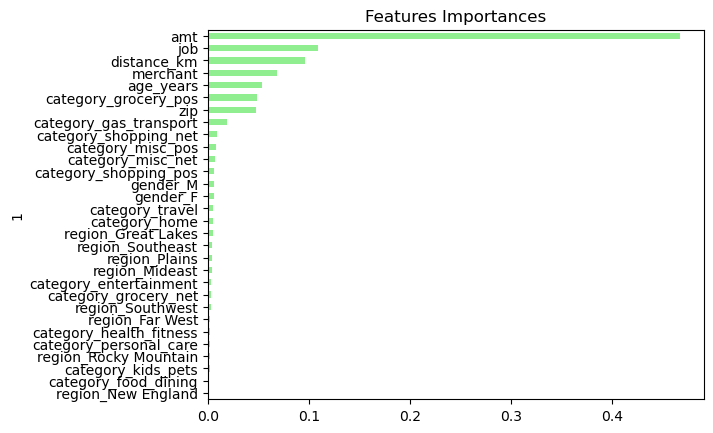

In [45]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')

importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Create a Support Vector Machine Model with the training data.

In [46]:
SVCmodel = SVC(kernel='rbf', random_state=1)

In [47]:
start_time = time.time()

SVCmodel.fit(X_train_enc_scaled_df, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 743.8302309513092 seconds ---


In [48]:
print('Test Acc: %.3f' % SVCmodel.score(X_test_enc_scaled_df, y_test))

Test Acc: 0.998


In [49]:
y_pred=SVCmodel.predict(X_test_enc_scaled_df)

In [50]:
print('Test Acc: %.3f' % log_model.score(X_test_enc_scaled_df, y_test))

Test Acc: 0.996


In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[138346,     39],
       [   235,    310]], dtype=int64)

In [52]:
#putting the confusion matrix into a dataframe
cm_df = pd.DataFrame(
    cm, index=["Legitimate-0", "Fraudulent-1"], columns=["Legitimate True-0", "Predicted Fraudulent-1"]
)

In [53]:
# Print the classification report for the model
acc_score = accuracy_score(y_test, y_pred)
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Legitimate True-0,Predicted Fraudulent-1
Legitimate-0,138346,39
Fraudulent-1,235,310


Accuracy Score : 0.9980277837760023
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138385
           1       0.89      0.57      0.69       545

    accuracy                           1.00    138930
   macro avg       0.94      0.78      0.85    138930
weighted avg       1.00      1.00      1.00    138930



In [56]:
#create a neural network model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=26, activation='relu', input_dim=34, kernel_regularizer=regularizers.L1(.001)))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=31, activation='relu', kernel_regularizer=regularizers.L1(.001)))

#adding Third hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.L1(.001)))

# #adding forth hidden layer
nn.add(tf.keras.layers.Dense(units=11, activation='relu', kernel_regularizer=regularizers.L1(.001)))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

ModuleNotFoundError: No module named 'keras.api'